In [16]:
# import library
from scipy.io import loadmat
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

from warpped.collection import parse_chronnectome, get_mean_chronnectome, get_number_of_visit, warp_knn
# import gloabl variables
from warpped.global_variables import * 

In [17]:
# The selected model should be contained in global_variables, if wanna try different parameter then uncomment bleow 
# K_state=12; rep_num = 2

hmm_file = base+f'chronotype_k{K_state}_rep_{rep_num}.mat'
hmminfo_file = base+f'hmminfo/hmminfo_k{K_state}_rep_{rep_num}.mat'
hmminfo_file

'/home/jzni/dissertation/analysis/output/hmminfo/hmminfo_k16_rep_2.mat'

In [18]:
hmm = loadmat(hmm_file)
hmm_info = loadmat(hmminfo_file)

In [19]:
# Parse HMM info
state_order = np.squeeze(hmm_info['ord']) # the order of state for fo_corr and ordered_p
fo_corr = pd.DataFrame(hmm_info['fo_matrix'], columns=state_order, index=state_order)
ordered_p = pd.DataFrame(hmm_info['ordered_p'], columns=state_order, index=state_order)

## hmms = hmm_info['hmms']  # contains the subject specific hmm
# Parse chronnectome info
## info based on veterbi path 
raw_fo, lifetime, intervals = parse_chronnectome(hmm_info[hmminfo_source], model_selection=False)


## Load Data

In [20]:
performance = pd.read_csv(f'{behav_dir}performance_proc.csv')
physio = pd.read_csv(f'{behav_dir}physio_proc.csv')
acti = pd.read_csv(f'{behav_dir}actigraph_proc.csv')
scales = pd.read_csv(f'{behav_dir}questionnaire_proc.csv')


In [21]:
fo_df =  pd.DataFrame(raw_fo, columns=[f'state{i}_fo' for i in range(1, K_state+1)])
lifetime_df = pd.DataFrame(get_mean_chronnectome(lifetime ), columns=[f'state{i}_life' for i in range(1, K_state+1)])
interval_df = pd.DataFrame(get_mean_chronnectome(intervals), columns=[f'state{i}_intervals' for i in range(1, K_state+1)])
visits_df = get_number_of_visit(lifetime)
visits_df.head()

,state1_visits,state2_visits,state3_visits,state4_visits,state5_visits,state6_visits,state7_visits,state8_visits,state9_visits,state10_visits,state11_visits,state12_visits,state13_visits,state14_visits,state15_visits,state16_visits
0,6,3,13,4,10,9,7,6,2,6,6,10,9,5,3,3
1,9,9,9,8,6,3,1,6,5,7,2,3,7,6,6,8
2,10,5,20,10,9,10,1,4,2,10,10,5,1,4,8,6
3,7,3,14,6,2,3,1,9,4,9,15,5,8,7,8,2
4,12,8,11,10,16,6,0,5,1,10,5,3,5,6,7,2


In [22]:
chronnectome_df = pd.concat([fo_df,lifetime_df, interval_df, visits_df], axis=1).applymap(lambda x: round(float(x),2))
chronnectome_df

,state1_fo,state2_fo,state3_fo,state4_fo,state5_fo,state6_fo,state7_fo,state8_fo,state9_fo,state10_fo,...,state7_visits,state8_visits,state9_visits,state10_visits,state11_visits,state12_visits,state13_visits,state14_visits,state15_visits,state16_visits
0,0.05,0.03,0.12,0.03,0.12,0.12,0.09,0.06,0.02,0.05,...,7.0,6.0,2.0,6.0,6.0,10.0,9.0,5.0,3.0,3.0
1,0.10,0.12,0.06,0.10,0.06,0.03,0.00,0.08,0.07,0.06,...,1.0,6.0,5.0,7.0,2.0,3.0,7.0,6.0,6.0,8.0
2,0.08,0.04,0.11,0.10,0.08,0.08,0.01,0.03,0.03,0.10,...,1.0,4.0,2.0,10.0,10.0,5.0,1.0,4.0,8.0,6.0
3,0.08,0.04,0.12,0.06,0.02,0.03,0.01,0.08,0.02,0.08,...,1.0,9.0,4.0,9.0,15.0,5.0,8.0,7.0,8.0,2.0
4,0.12,0.09,0.07,0.11,0.14,0.05,0.00,0.03,0.01,0.10,...,0.0,5.0,1.0,10.0,5.0,3.0,5.0,6.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.10,0.06,0.16,0.07,0.09,0.03,0.00,0.02,0.06,0.08,...,0.0,3.0,7.0,7.0,7.0,9.0,3.0,6.0,5.0,5.0
107,0.07,0.08,0.11,0.11,0.11,0.08,0.00,0.04,0.08,0.09,...,1.0,4.0,6.0,7.0,4.0,3.0,0.0,1.0,6.0,7.0
108,0.11,0.02,0.10,0.07,0.11,0.05,0.10,0.04,0.01,0.06,...,8.0,6.0,2.0,4.0,5.0,3.0,7.0,5.0,6.0,6.0
109,0.09,0.06,0.12,0.05,0.04,0.06,0.00,0.00,0.05,0.16,...,0.0,1.0,6.0,12.0,2.0,5.0,4.0,6.0,7.0,7.0


<AxesSubplot:>

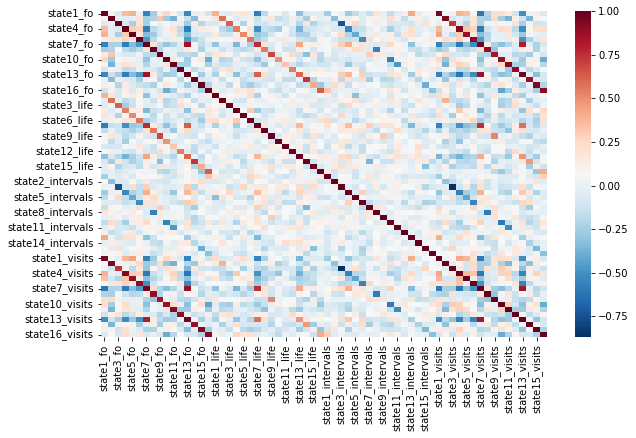

In [23]:
# FO matrix
plt.figure(figsize=(10,6))
sns.heatmap(chronnectome_df.corr(),cmap='RdBu_r')

## Label Encoding


In [24]:
# Chronotype Encoding
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(performance[['Type']])
chrono_array = oe_results.toarray()[:,0]
chrono_array

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
# Session Encoding 
# ... do this in a better way
ses_list = []
for ses in [0, 1, 2]:
    ses_list += [ses for i in range(37)]
ses_array = np.array(ses_list)
ses_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

## Correlation

In [86]:
fo = fo_df.copy()
fo['chrono']=chrono_array; fo['time']=ses_array


In [87]:
fo

,state1_fo,state2_fo,state3_fo,state4_fo,state5_fo,state6_fo,state7_fo,state8_fo,state9_fo,state10_fo,state11_fo,state12_fo,chrono,time
0,0.097778,0.088889,0.120000,0.055556,0.086667,0.066667,0.157778,0.015556,0.093333,0.066667,0.055556,0.095556,1.0,0
1,0.068889,0.106667,0.066667,0.113333,0.073333,0.108889,0.068889,0.066667,0.071111,0.080000,0.084444,0.091111,1.0,0
2,0.113333,0.173333,0.004444,0.080000,0.108889,0.113333,0.084444,0.035556,0.111111,0.100000,0.037778,0.037778,1.0,0
3,0.062222,0.088889,0.111111,0.073333,0.173333,0.011111,0.073333,0.020000,0.166667,0.102222,0.082222,0.035556,1.0,0
4,0.091111,0.157778,0.051111,0.140000,0.037778,0.117778,0.055556,0.035556,0.095556,0.093333,0.073333,0.051111,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.133333,0.106667,0.013333,0.111111,0.093333,0.060000,0.080000,0.086667,0.142222,0.086667,0.046667,0.040000,0.0,2
107,0.095556,0.135556,0.028889,0.068889,0.048889,0.195556,0.073333,0.106667,0.126667,0.095556,0.004444,0.020000,0.0,2
108,0.151111,0.111111,0.097778,0.120000,0.040000,0.122222,0.080000,0.053333,0.073333,0.073333,0.064444,0.013333,0.0,2
109,0.122222,0.102222,0.037778,0.100000,0.022222,0.137778,0.091111,0.060000,0.117778,0.095556,0.077778,0.035556,0.0,2


# Group analysis  


In [113]:
import scipy
from scipy import stats 

random_state = 42

In [115]:
#@title Warp the mean comparison function
def norm_test(group_list, alpha=0.05):
    total_norm=True
    for group in group_list:
        total_norm = total_norm & (stats.shapiro(group)[1]>=0.05)
        if total_norm == False:
            return total_norm
    return total_norm

def compare_mean(df1,df2, K_state):
    mean = []
    for state_index in range(K_state):
        g1=df1.iloc[:, state_index]; g2 = df2.iloc[:, state_index]
        norm = norm_test([g1,g2])
        equal_var = True if stats.levene(g1,g2)[1]>0.05 else False
        if norm:
            mean_comp = stats.ttest_ind(g1, g2, equal_var=equal_var)
        else: 
            mean_comp = stats.mannwhitneyu(g1, g2)
        mean.append([norm, equal_var, mean_comp[0], mean_comp[1]])
    return pd.DataFrame(mean,index=[f"State {i+1}" for i in range(K_state)],
             columns=['normality', 'equal variance', 'stat', 'p value'])


## Two-way Anova

In [126]:
fo

,state1_fo,state2_fo,state3_fo,state4_fo,state5_fo,state6_fo,state7_fo,state8_fo,state9_fo,state10_fo,state11_fo,state12_fo,chrono,time
0,0.097778,0.088889,0.120000,0.055556,0.086667,0.066667,0.157778,0.015556,0.093333,0.066667,0.055556,0.095556,1.0,0
1,0.068889,0.106667,0.066667,0.113333,0.073333,0.108889,0.068889,0.066667,0.071111,0.080000,0.084444,0.091111,1.0,0
2,0.113333,0.173333,0.004444,0.080000,0.108889,0.113333,0.084444,0.035556,0.111111,0.100000,0.037778,0.037778,1.0,0
3,0.062222,0.088889,0.111111,0.073333,0.173333,0.011111,0.073333,0.020000,0.166667,0.102222,0.082222,0.035556,1.0,0
4,0.091111,0.157778,0.051111,0.140000,0.037778,0.117778,0.055556,0.035556,0.095556,0.093333,0.073333,0.051111,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.133333,0.106667,0.013333,0.111111,0.093333,0.060000,0.080000,0.086667,0.142222,0.086667,0.046667,0.040000,0.0,2
107,0.095556,0.135556,0.028889,0.068889,0.048889,0.195556,0.073333,0.106667,0.126667,0.095556,0.004444,0.020000,0.0,2
108,0.151111,0.111111,0.097778,0.120000,0.040000,0.122222,0.080000,0.053333,0.073333,0.073333,0.064444,0.013333,0.0,2
109,0.122222,0.102222,0.037778,0.100000,0.022222,0.137778,0.091111,0.060000,0.117778,0.095556,0.077778,0.035556,0.0,2


In [140]:
#@title warp twoway_anova
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols
def twoway_anova(fo, K_state, n_rep=1000):
    anova_tables = [] ; Fvalue_table=pd.DataFrame()
    state_list = [ f'state{i}' for i in range(1, K_state+1)]
    for state in state_list:
        model = ols(f"{state}_fo ~ C(chrono)+ C(time)+ C(chrono)*C(time)", data=fo).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        anova_tables.append(anova_table)
        Fvalue_table[f"{state}_F"] = anova_table.loc[:,'F']
        Fvalue_table[f"{state}_p"] = anova_table.loc[:,'PR(>F)']
    
    return Fvalue_table, anova_tables 

In [154]:
#@title Warp boxplot function
def twoway_boxplot(fo, K_state, subplotformat='33',figsize1=(15,8), title=""):
    subplot_num= K_state
    state_list = [ f'state{i}' for i in range(1, K_state+1)]
    plt.figure(figsize=figsize1)  
    for i in range(len(state_list)):
        state = state_list[i]
        ax = plt.subplot(int(f'{subplotformat}{i+1}'))
        plt.tight_layout()
        sns.boxplot(x="time", y=f"{state}_fo", hue="chrono", data=fo, palette="Set3") 

In [155]:
# Ordinary Least Squares (OLS) model
# model = ols(f"{state} ~ C(chronotype)+ C(time)+ C(chronotype)*C(time)", data=fo).fit()

Fvalue_table, anova_tables = twoway_anova(fo,K_state)
Fvalue_table

,state1_F,state1_p,state2_F,state2_p,state3_F,state3_p,state4_F,state4_p,state5_F,state5_p,...,state8_F,state8_p,state9_F,state9_p,state10_F,state10_p,state11_F,state11_p,state12_F,state12_p
C(chrono),5.591600,0.019884,0.005832,0.939272,0.069397,0.792733,4.890509,0.029172,1.815988,0.180692,...,1.086346,0.299676,0.533154,0.466910,1.140852,0.287922,0.025274,0.873992,1.665359,0.199716
C(time),0.152873,0.858429,1.576143,0.211623,0.188693,0.828321,0.656755,0.520648,1.496716,0.228601,...,1.542856,0.218576,0.295247,0.744963,0.119108,0.887832,1.320085,0.271509,0.063482,0.938527
C(chrono):C(time),0.249395,0.779732,0.779704,0.461178,0.283057,0.754050,0.140503,0.869084,1.084628,0.341784,...,0.493314,0.612007,0.258096,0.773010,0.098534,0.906248,0.572607,0.565805,0.293509,0.746252
Residual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ValueError: Single argument to subplot must be a three-digit integer, not 3310

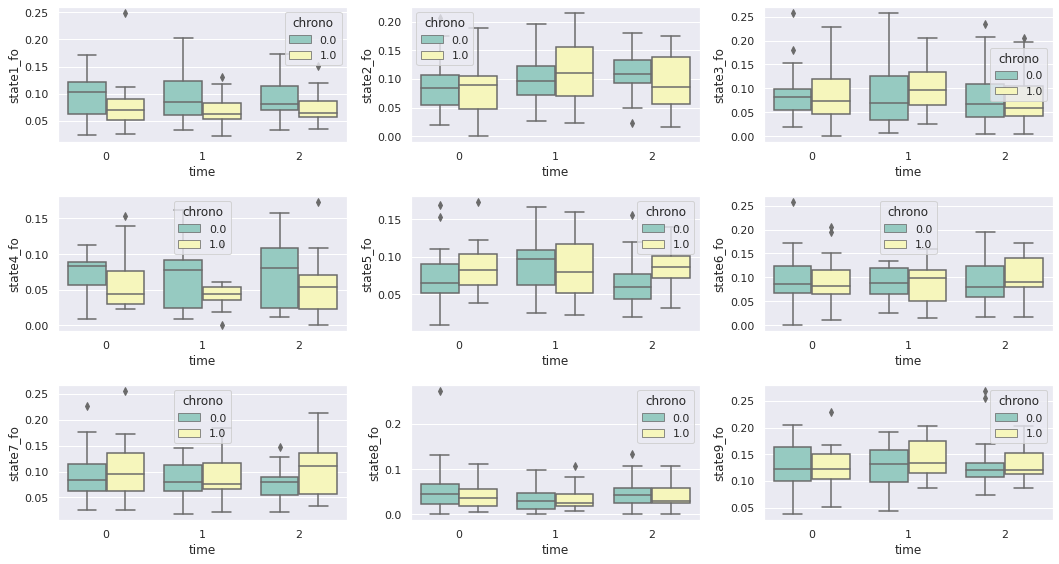

In [156]:
twoway_boxplot(fo, K_state)

## Chronotype

In [ ]:
ECP = fo[fo['chronotype']==1]; LCP = fo[fo['chronotype']==0] 

In [ ]:
compare_mean(ECP,LCP, K_state)

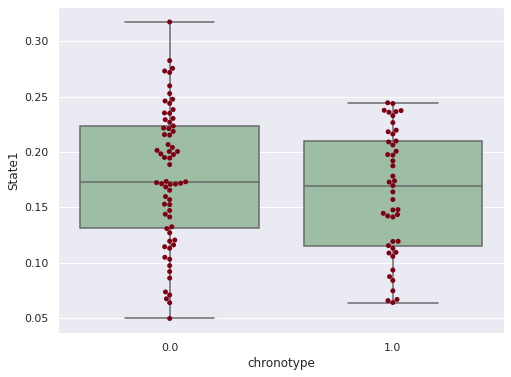

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='chronotype', y='State1', data=fo, color='#99c2a2')
ax = sns.swarmplot(x='chronotype', y='State1', data=fo, color='#7d0013')

plt.show()

## Time of the day

In [160]:
#@title warp oneway_anova
def oneway_anova(fo,K_state):
    li = []
    state_list = [ f'state{i}_fo' for i in range(1, K_state+1)]
    for state in state_list:
        m=fo[fo['time']==0][state]
        a=fo[fo['time']==1][state]
        e=fo[fo['time']==2][state]
        li.append(stats.f_oneway(m,a,e))
    return pd.DataFrame(li, index=state_list, columns=['F value', 'p value'])

In [161]:
oneway_anova(fo, K_state)

,F value,p value
state1_fo,0.148620,0.862072
state2_fo,1.597363,0.207175
state3_fo,0.192917,0.824834
state4_fo,0.643810,0.527291
state5_fo,1.483185,0.231498
state6_fo,0.432371,0.650087
state7_fo,0.638192,0.530227
state8_fo,1.556214,0.215626
state9_fo,0.300678,0.740934
state10_fo,0.120969,0.886181


In [162]:
M = ECP = fo[fo['time']==0]; A = fo[fo['time']==1]; E = fo[fo['time']==2] 

In [163]:
compare_mean(M,A, K_state)

,normality,equal variance,stat,p value
State 1,False,True,727.000000,0.649671
State 2,True,True,-1.561484,0.122795
State 3,False,True,675.500000,0.926766
State 4,False,True,818.000000,0.150262
State 5,True,True,-1.244257,0.217440
State 6,True,True,0.877491,0.383139
State 7,False,True,752.000000,0.468679
State 8,False,True,818.500000,0.148738
State 9,True,True,-0.767433,0.445334
State 10,True,True,0.234786,0.815041


In [164]:
compare_mean(A, E, K_state)

,normality,equal variance,stat,p value
State 1,False,True,666.000000,0.845640
State 2,True,True,0.189699,0.850079
State 3,False,True,738.500000,0.562873
State 4,False,True,618.500000,0.478621
State 5,True,True,1.650722,0.103151
State 6,True,True,-0.761657,0.448753
State 7,True,True,-0.233538,0.816006
State 8,False,True,535.500000,0.108044
State 9,False,True,757.000000,0.436190
State 10,True,True,-0.509639,0.611863


In [165]:
compare_mean(M,E, K_state)

,normality,equal variance,stat,p value
State 1,False,True,712.500000,0.766145
State 2,True,True,-1.451168,0.151076
State 3,False,True,751.000000,0.475302
State 4,False,True,742.000000,0.537550
State 5,True,True,0.328905,0.743182
State 6,True,True,0.174447,0.862004
State 7,False,True,740.000000,0.551982
State 8,False,True,684.000000,1.000000
State 9,False,True,667.000000,0.854116
State 10,True,True,-0.249547,0.803648


In [166]:
get_number_of_visit(lifetime)

,state1_visits,state2_visits,state3_visits,state4_visits,state5_visits,state6_visits,state7_visits,state8_visits,state9_visits,state10_visits,state11_visits,state12_visits
0,10,8,13,6,10,7,10,2,8,9,5,8
1,7,8,8,13,10,10,5,4,9,7,7,9
2,13,17,1,9,9,10,9,3,21,10,5,4
3,6,11,10,7,13,2,5,3,13,10,6,3
4,9,14,5,16,4,9,6,3,12,11,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
106,12,10,2,10,11,5,8,8,11,10,6,6
107,7,13,3,9,5,15,8,10,14,9,1,3
108,10,9,10,15,5,12,8,5,9,6,5,2
109,11,7,5,13,2,10,8,6,12,8,7,2
